In [ ]:
import tensorflow as tf
import numpy as np
import datetime


In [2]:
conda install -c anaconda tensorflow=2.5.0

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - tensorflow=2.5.0

Current channels:

  - https://conda.anaconda.org/anaconda/osx-64
  - https://conda.anaconda.org/anaconda/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
print(fashion_mnist)

<module 'tensorflow.keras.datasets.fashion_mnist' from '/Users/apple/opt/anaconda3/lib/python3.7/site-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>


In [5]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train = X_train/255.0

In [9]:
X_test = X_test/255.0

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train.reshape(-1,28*28)

In [12]:
X_test = X_test.reshape(-1,28*28)

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_test.shape

(10000, 784)

In [15]:
from tensorflow.keras.layers import Dense,Dropout

In [16]:
model = tf.keras.models.Sequential()

USING DROPOUT LAYER

In [17]:
model.add(Dense(128,activation='relu',input_shape=(784,)))

model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [18]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),
         batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5968 - sparse_categorical_accuracy: 0.7939 - val_loss: 0.4638 - val_sparse_categorical_accuracy: 0.8377
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4243 - sparse_categorical_accuracy: 0.8501 - val_loss: 0.4066 - val_sparse_categorical_accuracy: 0.8563
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3840 - sparse_categorical_accuracy: 0.8636 - val_loss: 0.3924 - val_sparse_categorical_accuracy: 0.8603
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3618 - sparse_categorical_accuracy: 0.8697 - val_loss: 0.3841 - val_sparse_categorical_accuracy: 0.8636
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3430 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.3582 - val_sparse_categorical_accuracy: 0.8740


In [19]:
import pandas as pd
df = pd.DataFrame(model.history.history)
df

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.596798,0.793917,0.463757,0.8377
1,0.424321,0.850083,0.406644,0.8563
2,0.384008,0.863567,0.392413,0.8603
3,0.361804,0.869717,0.384119,0.8636
4,0.343030,0.876500,0.358242,0.8740


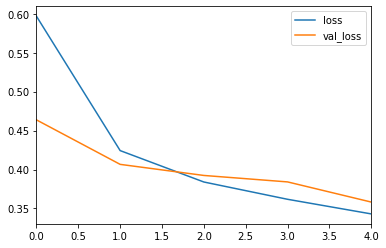

In [36]:
df[['loss','val_loss']].plot()

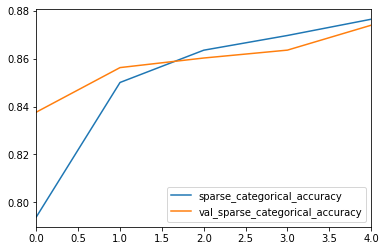

In [21]:
df[['sparse_categorical_accuracy','val_sparse_categorical_accuracy']].plot()

In [22]:
loss,accuracy = model.evaluate(X_test,y_test)
print(loss,"\n",accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3582 - sparse_categorical_accuracy: 0.8740
0.3582415282726288 
 0.8740000128746033


In [23]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))

[[811   3  11  23   6   0 135   1  10   0]
 [  2 969   0  19   5   0   4   0   1   0]
 [ 16   3 758   6 122   0  94   0   1   0]
 [ 24  15  10 861  47   0  38   0   5   0]
 [  0   1  78  24 828   0  67   0   2   0]
 [  0   0   0   1   0 935   0  39   2  23]
 [102   2  76  27  79   0 705   0   9   0]
 [  0   0   0   0   0  20   0 947   0  33]
 [  3   1   2   5   5   2  11   5 966   0]
 [  0   0   0   0   0   2   1  37   0 960]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.81      0.76      0.78      1000
           3       0.89      0.86      0.88      1000
           4       0.76      0.83      0.79      1000
           5       0.97      0.94      0.95      1000
           6       0.67      0.70      0.69      1000
           7       0.92      0.95      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



USING CALLBACKS - EARLYSTOPPING

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,
                          patience=10)

In [29]:
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [30]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),
         epochs=15,
         callbacks=[early_stop],
         batch_size=128)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.5900 - sparse_categorical_accuracy: 0.8439 - val_loss: 0.3948 - val_sparse_categorical_accuracy: 0.8647
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3474 - sparse_categorical_accuracy: 0.8772 - val_loss: 0.3734 - val_sparse_categorical_accuracy: 0.8712
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.3358 - sparse_categorical_accuracy: 0.8811 - val_loss: 0.3565 - val_sparse_categorical_accuracy: 0.8784
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.3211 - sparse_categorical_accuracy: 0.8846 - val_loss: 0.3489 - val_sparse_categorical_accuracy: 0.8775
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.3107 - sparse_categorical_accuracy: 0.8898 - val_loss: 0.3596 - val_sparse_categorical_accuracy: 0.8748
Epoch 6/15
469/469 [==============================] - 1s 2ms/step - loss: 0.3036 - sparse_categorica

In [31]:
df1 = pd.DataFrame(model.history.history)

In [32]:
df1

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.590013,0.843950,0.394827,0.8647
1,0.347372,0.877200,0.373367,0.8712
2,0.335770,0.881117,0.356527,0.8784
3,0.321069,0.884583,0.348891,0.8775
4,0.310746,0.889833,0.359601,0.8748
5,0.303557,0.891333,0.354105,0.8787
6,0.297733,0.892450,0.349527,0.8770
7,0.288954,0.896167,0.345814,0.8798
8,0.284266,0.895917,0.343470,0.8838
9,0.278484,0.901167,0.337165,0.8852


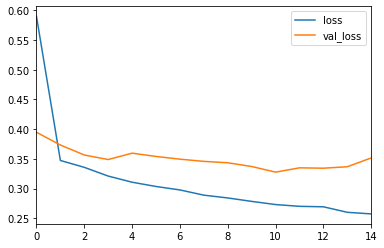

In [33]:
df1[['loss','val_loss']].plot()

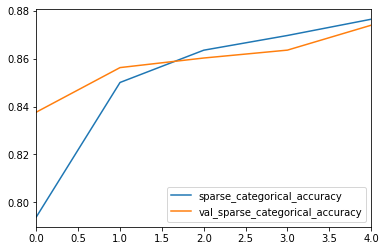

In [34]:
df[['sparse_categorical_accuracy','val_sparse_categorical_accuracy']].plot()

In [35]:
tes1,acc1 = model.evaluate(X_test,y_test)
print(tes1,'\n',acc1)

313/313 [==============================] - 0s 894us/step - loss: 0.3516 - sparse_categorical_accuracy: 0.8765
0.3516092896461487 
 0.8765000104904175
